# Callan–Symanzik equation

https://en.wikipedia.org/wiki/Callan%E2%80%93Symanzik_equation

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.831589,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.824478,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.014099,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.481060,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.326996,82271200


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.326309,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.814041,234330000
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.568638,212468400
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.587894,169165600
2018-12-31,39.632500,39.840000,39.119999,39.435001,37.951183,140014000


In [4]:
def callan_symanzik(x, a, b, c):
    return a * np.exp(b * x) + c


In [5]:
# Extract the adjusted close prices from the stock data
prices = df["Adj Close"].values

# Generate an array of x values (time index)
x = np.arange(len(prices))

# Fit the Callan-Symanzik equation to the data
popt, pcov = curve_fit(callan_symanzik, x, prices)

# Generate y values using the fitted parameters
y = callan_symanzik(x, *popt)

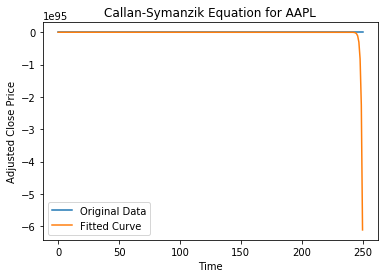

In [6]:
# Plot the original data and the fitted curve
plt.plot(x, prices, label="Original Data")
plt.plot(x, y, label="Fitted Curve")
plt.xlabel("Time")
plt.ylabel("Adjusted Close Price")
plt.title(f"Callan-Symanzik Equation for {symbol}")
plt.legend()
plt.show()